In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

path = "C:\\Users\\ADMIN\\Desktop\\DATA 5322 SML-2\\Assignments\\Assignment-2\\Housing.csv"
Housing =  pd.read_csv(path)


In [3]:
Housing.head(10)

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,NFAMS,NCOUPLES,PERNUM,PERWT,AGE,MARST,BIRTHYR,EDUC,EDUCD,INCTOT
0,1371772,920.0,1,13,9990,9993,360,9993,75000,700000,...,1,0,1,14,52,6,1969,7,71,75000
1,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,2,0,1,83,22,6,1999,10,101,5600
2,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,2,0,2,106,22,6,1999,7,71,8000
3,1371774,22.5,1,13,600,9993,9993,9993,7000,800000,...,1,0,1,33,62,4,1959,6,63,7000
4,1371775,3710.4,2,22,3600,9993,9997,9993,50500,9999999,...,1,0,1,297,50,3,1971,7,71,16000
5,1371775,3710.4,2,22,3600,9993,9997,9993,50500,9999999,...,1,0,2,287,18,6,2003,6,61,34500
6,1371776,448.2,1,12,1560,3000,9993,9993,155300,850000,...,1,1,1,12,80,1,1941,10,101,63000
7,1371776,448.2,1,12,1560,3000,9993,9993,155300,850000,...,1,1,2,10,93,1,1928,10,101,89800
8,1371776,448.2,1,12,1560,3000,9993,9993,155300,850000,...,1,1,3,17,52,6,1969,10,101,2500
9,1371777,155.4,1,13,1800,480,1500,9993,75000,180000,...,1,0,1,199,61,4,1960,10,101,65000


In [4]:
Housing.columns

Index(['SERIAL', 'DENSITY', 'OWNERSHP', 'OWNERSHPD', 'COSTELEC', 'COSTGAS',
       'COSTWATR', 'COSTFUEL', 'HHINCOME', 'VALUEH', 'ROOMS', 'BUILTYR2',
       'BEDROOMS', 'VEHICLES', 'NFAMS', 'NCOUPLES', 'PERNUM', 'PERWT', 'AGE',
       'MARST', 'BIRTHYR', 'EDUC', 'EDUCD', 'INCTOT'],
      dtype='object')

In [5]:
Housing.shape

(75388, 24)

In [7]:
null_values = Housing.isnull().sum()
print(null_values)

SERIAL       0
DENSITY      0
OWNERSHP     0
OWNERSHPD    0
COSTELEC     0
COSTGAS      0
COSTWATR     0
COSTFUEL     0
HHINCOME     0
VALUEH       0
ROOMS        0
BUILTYR2     0
BEDROOMS     0
VEHICLES     0
NFAMS        0
NCOUPLES     0
PERNUM       0
PERWT        0
AGE          0
MARST        0
BIRTHYR      0
EDUC         0
EDUCD        0
INCTOT       0
dtype: int64


In [9]:
idx_max_age = Housing.groupby('SERIAL')['AGE'].idxmax()
df_g = Housing.loc[idx_max_age]
print(df_g)

        SERIAL  DENSITY  OWNERSHP  OWNERSHPD  COSTELEC  COSTGAS  COSTWATR  \
0      1371772    920.0         1         13      9990     9993       360   
1      1371773   3640.9         2         22      1080     9993      1800   
3      1371774     22.5         1         13       600     9993      9993   
4      1371775   3710.4         2         22      3600     9993      9997   
7      1371776    448.2         1         12      1560     3000      9993   
...        ...      ...       ...        ...       ...      ...       ...   
75373  1402569    362.4         1         13      1200     9993       500   
75375  1402570    667.7         1         12       600     1200       750   
75378  1402571   2425.1         1         13      2400      600      1400   
75382  1402572   2295.9         1         13      1200     9992      1600   
75386  1402573   2754.9         2         22      9990     7200       960   

       COSTFUEL  HHINCOME   VALUEH  ...  NFAMS  NCOUPLES  PERNUM  PERWT  AG

In [10]:
df_g.shape

(30802, 24)

In [11]:
print(df_g.corr())


             SERIAL   DENSITY  OWNERSHP  OWNERSHPD  COSTELEC   COSTGAS  \
SERIAL     1.000000  0.001762 -0.002579  -0.003924 -0.007467  0.008856   
DENSITY    0.001762  1.000000  0.176748   0.183318  0.006998 -0.045233   
OWNERSHP  -0.002579  0.176748  1.000000   0.995076  0.104018  0.251134   
OWNERSHPD -0.003924  0.183318  0.995076   1.000000  0.101824  0.246906   
COSTELEC  -0.007467  0.006998  0.104018   0.101824  1.000000  0.155282   
COSTGAS    0.008856 -0.045233  0.251134   0.246906  0.155282  1.000000   
COSTWATR  -0.004026 -0.071981  0.324054   0.316322  0.202994  0.246608   
COSTFUEL  -0.000627  0.109210  0.109097   0.112428 -0.003430 -0.085759   
HHINCOME   0.006539  0.145538 -0.213288  -0.198340  0.022069 -0.164219   
VALUEH    -0.003067  0.194955  0.993267   0.989235  0.112484  0.236147   
ROOMS      0.006753 -0.133729 -0.447057  -0.442543  0.017614 -0.225124   
BUILTYR2   0.000344 -0.067828  0.042951   0.049379 -0.052897 -0.046997   
BEDROOMS   0.006107 -0.148602 -0.46881

In [12]:
columns_to_drop = ['SERIAL', 'OWNERSHPD','DENSITY', 'COSTELEC', 'COSTGAS', 'COSTWATR', 'COSTFUEL', 
                   'PERNUM', 'PERWT', 'BIRTHYR', 'INCTOT','EDUCD','ROOMS']

df = df_g.drop(columns=columns_to_drop)

print(df.head(10))


    OWNERSHP  HHINCOME   VALUEH  BUILTYR2  BEDROOMS  VEHICLES  NFAMS  \
0          1     75000   700000         7         4         2      1   
1          2     13600  9999999         4         4         2      2   
3          1      7000   800000         5         4         2      1   
4          2     50500  9999999         6         3         2      1   
7          1    155300   850000         6         4         2      1   
9          1     75000   180000         7         5         3      1   
13         2     51300  9999999         7         3         1      1   
14         2     82100  9999999         7         1         2      1   
16         2     20000  9999999         1         4         1      1   
18         1     42500   500000         5         5         1      1   

    NCOUPLES  AGE  MARST  EDUC  
0          0   52      6     7  
1          0   22      6    10  
3          0   62      4     6  
4          0   50      3     7  
7          1   93      1    10  
9        

In [13]:
def reassign_income(value):
    if value < 100000:
        return 1
    elif 100001 <= value <= 250000:
        return 2
    else:
        return 3

df['HHINCOME'] = df['HHINCOME'].apply(reassign_income)

In [14]:
def reassign_vehicles(value):
    if value == 9:
        return 0
    else:
        return value

df['VEHICLES'] = df['VEHICLES'].apply(reassign_vehicles)

In [15]:
df['Married'] = 0
df['Divorced'] = 0
df['NeverMarried'] = 0

df.loc[df['MARST'].isin([1, 2]), 'Married'] = 1
df.loc[df['MARST'].isin([3, 4, 5]), 'Divorced'] = 1
df.loc[df['MARST'] == 6, 'NeverMarried'] = 1


In [16]:
df['NoSchooling'] = 0
df['PrimarySchooling'] = 0
df['Schooling'] = 0
df['HighSchooling'] = 0
df['College'] = 0

df.loc[df['EDUC'] == 0, 'NoSchooling'] = 1
df.loc[df['EDUC'] == 1, 'PrimarySchooling'] = 1
df.loc[df['EDUC'] == 2, 'Schooling'] = 1
df.loc[df['EDUC'].between(3, 6), 'HighSchooling'] = 1
df.loc[df['EDUC'] >= 7, 'College'] = 1

In [17]:
df.head()

,OWNERSHP,HHINCOME,VALUEH,BUILTYR2,BEDROOMS,VEHICLES,NFAMS,NCOUPLES,AGE,MARST,EDUC,Married,Divorced,NeverMarried,NoSchooling,PrimarySchooling,Schooling,HighSchooling,College
0,1,1,700000,7,4,2,1,0,52,6,7,0,0,1,0,0,0,0,1
1,2,1,9999999,4,4,2,2,0,22,6,10,0,0,1,0,0,0,0,1
3,1,1,800000,5,4,2,1,0,62,4,6,0,1,0,0,0,0,1,0
4,2,1,9999999,6,3,2,1,0,50,3,7,0,1,0,0,0,0,0,1
7,1,2,850000,6,4,2,1,1,93,1,10,1,0,0,0,0,0,0,1


In [18]:
df.drop('MARST', axis=1, inplace=True)
df.drop('EDUC', axis=1, inplace=True)

In [19]:
df.head()

,OWNERSHP,HHINCOME,VALUEH,BUILTYR2,BEDROOMS,VEHICLES,NFAMS,NCOUPLES,AGE,Married,Divorced,NeverMarried,NoSchooling,PrimarySchooling,Schooling,HighSchooling,College
0,1,1,700000,7,4,2,1,0,52,0,0,1,0,0,0,0,1
1,2,1,9999999,4,4,2,2,0,22,0,0,1,0,0,0,0,1
3,1,1,800000,5,4,2,1,0,62,0,1,0,0,0,0,1,0
4,2,1,9999999,6,3,2,1,0,50,0,1,0,0,0,0,0,1
7,1,2,850000,6,4,2,1,1,93,1,0,0,0,0,0,0,1


In [20]:
df.columns

Index(['OWNERSHP', 'HHINCOME', 'VALUEH', 'BUILTYR2', 'BEDROOMS', 'VEHICLES',
       'NFAMS', 'NCOUPLES', 'AGE', 'Married', 'Divorced', 'NeverMarried',
       'NoSchooling', 'PrimarySchooling', 'Schooling', 'HighSchooling',
       'College'],
      dtype='object')

In [21]:
df.shape

(30802, 17)

# Linear SVM

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


selected_columns = ['OWNERSHP', 'VEHICLES', 'Married', 'NeverMarried', 'AGE','BEDROOMS', 'HighSchooling',
                    'College']


X = df[selected_columns[1:]]  
y = df['OWNERSHP']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc_default = SVC(kernel='linear')
svc_default.fit(X_train_scaled, y_train)

y_train_pred_default = svc_default.predict(X_train_scaled)
y_test_pred_default = svc_default.predict(X_test_scaled)

train_accuracy_default = accuracy_score(y_train, y_train_pred_default)
test_accuracy_default = accuracy_score(y_test, y_test_pred_default)

train_error_rate_default = 1 - train_accuracy_default
test_error_rate_default = 1 - test_accuracy_default

print("Linear SVM Model with Default Parameters:")
print("Training Accuracy:", train_accuracy_default)
print("Testing Accuracy:", test_accuracy_default)
print("Training Error Rate:", train_error_rate_default)
print("Testing Error Rate:", test_error_rate_default)
print()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

svc = SVC(kernel='linear')

grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

best_svc = SVC(kernel='linear', C=best_params['C'])
best_svc.fit(X_train_scaled, y_train)

y_train_pred = best_svc.predict(X_train_scaled)
y_test_pred = best_svc.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_error_rate = 1 - train_accuracy
test_error_rate = 1 - test_accuracy

print("Linear SVM Model with Cross-Validation Parameters:")
print("Best Hyperparameters:", best_params)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Training Error Rate:", train_error_rate)
print("Testing Error Rate:", test_error_rate)


Linear SVM Model with Default Parameters:
Training Accuracy: 0.8208339130838087
Testing Accuracy: 0.821880748836706
Training Error Rate: 0.1791660869161913
Testing Error Rate: 0.17811925116329397

Linear SVM Model with Cross-Validation Parameters:
Best Hyperparameters: {'C': 10}
Training Accuracy: 0.8212977134641251
Testing Accuracy: 0.8233957363921653
Training Error Rate: 0.17870228653587494
Testing Error Rate: 0.17660426360783466


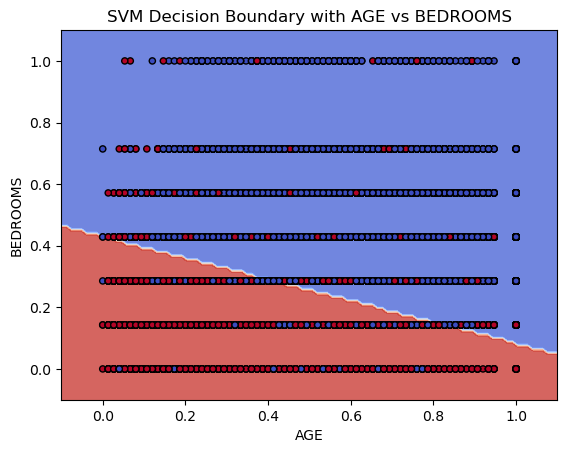

In [23]:

age_idx  = X.columns.get_loc('AGE')
bedrooms_idx = X.columns.get_loc('BEDROOMS')

X_plot = X.iloc[:, [age_idx,bedrooms_idx]]

scaler_plot = MinMaxScaler()
X_plot_scaled = scaler_plot.fit_transform(X_plot)

best_svc_plot = SVC(kernel='linear', C=best_params['C'])
best_svc_plot.fit(X_plot_scaled, y)

x_min, x_max = X_plot_scaled[:, 0].min() - 0.1, X_plot_scaled[:, 0].max() + 0.1
y_min, y_max = X_plot_scaled[:, 1].min() - 0.1, X_plot_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = best_svc_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_plot_scaled[:, 0], X_plot_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('AGE')
plt.ylabel('BEDROOMS')
plt.title('SVM Decision Boundary with AGE vs BEDROOMS')
plt.show()


# Radial

In [24]:

selected_columns = ['OWNERSHP', 'VEHICLES', 'Married', 'NeverMarried', 'AGE','BEDROOMS', 'HighSchooling',
                    'College']


X = df[selected_columns[1:]]  
y = df['OWNERSHP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

default_svc_rbf = SVC(kernel='rbf')
default_svc_rbf.fit(X_train_scaled, y_train)

y_train_pred_default = default_svc_rbf.predict(X_train_scaled)
y_test_pred_default = default_svc_rbf.predict(X_test_scaled)

train_accuracy_default = accuracy_score(y_train, y_train_pred_default)
test_accuracy_default = accuracy_score(y_test, y_test_pred_default)

train_error_rate_default = 1 - train_accuracy_default
test_error_rate_default = 1 - test_accuracy_default

print("Radial SVM Model with Default Parameters:")
print("Training Accuracy:", train_accuracy_default)
print("Testing Accuracy:", test_accuracy_default)
print("Training Error Rate:", train_error_rate_default)
print("Testing Error Rate:", test_error_rate_default)
print()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}

svc_rbf = SVC(kernel='rbf')

grid_search_rbf = GridSearchCV(svc_rbf, param_grid, cv=5)
grid_search_rbf.fit(X_train_scaled, y_train)

best_params_rbf = grid_search_rbf.best_params_
print("Best Hyperparameters with Radial Kernel:", best_params_rbf)

best_svc_rbf = SVC(kernel='rbf', C=best_params_rbf['C'], gamma=best_params_rbf['gamma'])
best_svc_rbf.fit(X_train_scaled, y_train)

y_train_pred_rbf = best_svc_rbf.predict(X_train_scaled)
y_test_pred_rbf = best_svc_rbf.predict(X_test_scaled)

train_accuracy_rbf = accuracy_score(y_train, y_train_pred_rbf)
test_accuracy_rbf = accuracy_score(y_test, y_test_pred_rbf)

# Calculate error rates
train_error_rate_rbf = 1 - train_accuracy_rbf
test_error_rate_rbf = 1 - test_accuracy_rbf

print("Radial SVM Model with Cross-Validation Parameters:")
print("Training Accuracy :", train_accuracy_rbf)
print("Testing Accuracy :", test_accuracy_rbf)
print("Training Error Rate :", train_error_rate_rbf)
print("Testing Error Rate :", test_error_rate_rbf)


Radial SVM Model with Default Parameters:
Training Accuracy: 0.821807893882473
Testing Accuracy: 0.8244778703603506
Training Error Rate: 0.178192106117527
Testing Error Rate: 0.17552212963964942

Best Hyperparameters with Radial Kernel: {'C': 10, 'gamma': 1}
Radial SVM Model with Cross-Validation Parameters:
Training Accuracy : 0.823941375631928
Testing Accuracy : 0.826209284709447
Training Error Rate : 0.17605862436807196
Testing Error Rate : 0.173790715290553


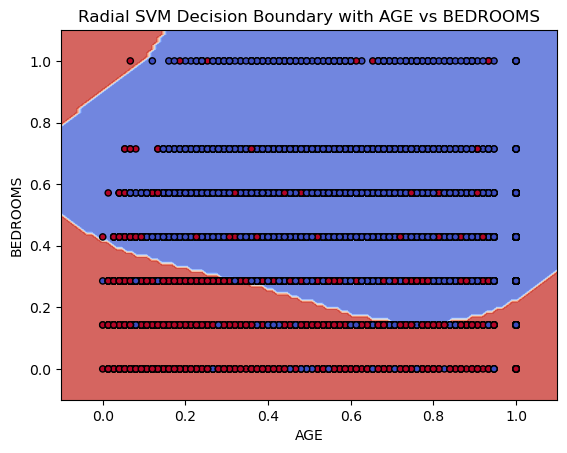

In [25]:

top_variables_rbf = ['AGE','BEDROOMS']

X_top_rbf = X[top_variables_rbf]

X_train_top_rbf, X_test_top_rbf, y_train_rbf, y_test_rbf = train_test_split(X_top_rbf, y, test_size=0.3, random_state=42)

scaler_top_rbf = MinMaxScaler()
X_train_scaled_top_rbf = scaler_top_rbf.fit_transform(X_train_top_rbf)
X_test_scaled_top_rbf = scaler_top_rbf.transform(X_test_top_rbf)

svc_top_rbf = SVC(kernel='rbf', C=best_params_rbf['C'], gamma=best_params_rbf['gamma'])

svc_top_rbf.fit(X_train_scaled_top_rbf, y_train_rbf)

x_min_rbf, x_max_rbf = X_train_scaled_top_rbf[:, 0].min() - 0.1, X_train_scaled_top_rbf[:, 0].max() + 0.1
y_min_rbf, y_max_rbf = X_train_scaled_top_rbf[:, 1].min() - 0.1, X_train_scaled_top_rbf[:, 1].max() + 0.1
xx_rbf, yy_rbf = np.meshgrid(np.linspace(x_min_rbf, x_max_rbf, 100), np.linspace(y_min_rbf, y_max_rbf, 100))
Z_rbf = svc_top_rbf.predict(np.c_[xx_rbf.ravel(), yy_rbf.ravel()])
Z_rbf = Z_rbf.reshape(xx_rbf.shape)

plt.contourf(xx_rbf, yy_rbf, Z_rbf, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_scaled_top_rbf[:, 0], X_train_scaled_top_rbf[:, 1], c=y_train_rbf, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel(top_variables_rbf[0])
plt.ylabel(top_variables_rbf[1])
plt.title('Radial SVM Decision Boundary with AGE vs BEDROOMS')
plt.show()


# Polynomial

In [26]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

default_svc_poly = SVC(kernel='poly')
default_svc_poly.fit(X_train_scaled, y_train)

y_train_pred_default_poly = default_svc_poly.predict(X_train_scaled)
y_test_pred_default_poly = default_svc_poly.predict(X_test_scaled)

train_accuracy_default_poly = accuracy_score(y_train, y_train_pred_default_poly)
test_accuracy_default_poly = accuracy_score(y_test, y_test_pred_default_poly)

train_error_rate_default_poly = 1 - train_accuracy_default_poly
test_error_rate_default_poly = 1 - test_accuracy_default_poly

print("Polynomial SVM Model with Default Parameters:")
print("Training Accuracy:", train_accuracy_default_poly)
print("Testing Accuracy:", test_accuracy_default_poly)
print("Training Error Rate:", train_error_rate_default_poly)
print("Testing Error Rate:", test_error_rate_default_poly)

print()

param_grid_poly = {'degree': [0,1, 2, 3]}

svc_poly = SVC(kernel='poly')

grid_search_poly = GridSearchCV(svc_poly, param_grid_poly, cv=5)
grid_search_poly.fit(X_train_scaled, y_train)

best_degree_poly = grid_search_poly.best_params_['degree']

best_svc_poly = SVC(kernel='poly', degree=best_degree_poly)
best_svc_poly.fit(X_train_scaled, y_train)

y_train_pred_poly = best_svc_poly.predict(X_train_scaled)
y_test_pred_poly = best_svc_poly.predict(X_test_scaled)

train_accuracy_poly = accuracy_score(y_train, y_train_pred_poly)
test_accuracy_poly = accuracy_score(y_test, y_test_pred_poly)

train_error_rate_poly = 1 - train_accuracy_poly
test_error_rate_poly = 1 - test_accuracy_poly

print("Polynomial SVM Model with Cross-Validation Parameters:")
print("Best Degree:", best_degree_poly)
print("Training Accuracy (Degree={}):".format(best_degree_poly), train_accuracy_poly)
print("Testing Accuracy (Degree={}):".format(best_degree_poly), test_accuracy_poly)
print("Training Error Rate (Degree={}):".format(best_degree_poly), train_error_rate_poly)
print("Testing Error Rate (Degree={}):".format(best_degree_poly), test_error_rate_poly)

Polynomial SVM Model with Default Parameters:
Training Accuracy: 0.8192106117527016
Testing Accuracy: 0.8224218158207987
Training Error Rate: 0.1807893882472984
Testing Error Rate: 0.17757818417920135

Polynomial SVM Model with Cross-Validation Parameters:
Best Degree: 1
Training Accuracy (Degree=1): 0.8208339130838087
Testing Accuracy (Degree=1): 0.821880748836706
Training Error Rate (Degree=1): 0.1791660869161913
Testing Error Rate (Degree=1): 0.17811925116329397


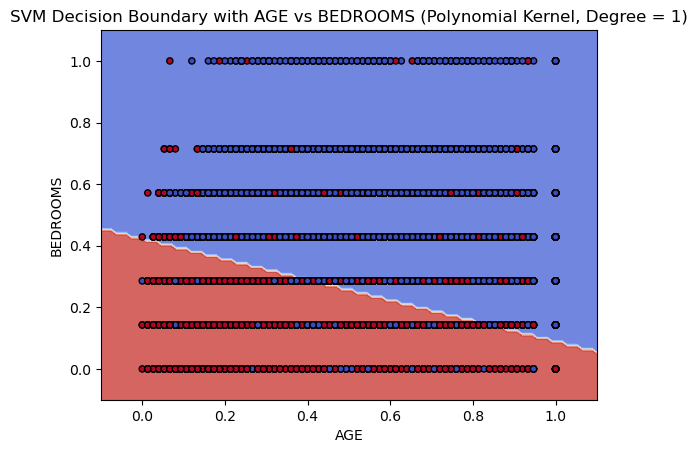

In [27]:
top_variables_poly = ['AGE','BEDROOMS']

X_top_poly = X[top_variables_poly]

X_train_top_poly, X_test_top_poly, y_train_poly, y_test_poly = train_test_split(X_top_poly, y, test_size=0.3, random_state=42)

scaler_top_poly = MinMaxScaler()
X_train_scaled_top_poly = scaler_top_poly.fit_transform(X_train_top_poly)
X_test_scaled_top_poly = scaler_top_poly.transform(X_test_top_poly)

svc_top_poly = SVC(kernel='poly', degree=best_degree_poly)

svc_top_poly.fit(X_train_scaled_top_poly, y_train_poly)

x_min_poly, x_max_poly = X_train_scaled_top_poly[:, 0].min() - 0.1, X_train_scaled_top_poly[:, 0].max() + 0.1
y_min_poly, y_max_poly = X_train_scaled_top_poly[:, 1].min() - 0.1, X_train_scaled_top_poly[:, 1].max() + 0.1
xx_poly, yy_poly = np.meshgrid(np.linspace(x_min_poly, x_max_poly, 100), np.linspace(y_min_poly, y_max_poly, 100))
Z_poly = svc_top_poly.predict(np.c_[xx_poly.ravel(), yy_poly.ravel()])
Z_poly = Z_poly.reshape(xx_poly.shape)

plt.contourf(xx_poly, yy_poly, Z_poly, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_scaled_top_poly[:, 0], X_train_scaled_top_poly[:, 1], c=y_train_poly, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel(top_variables_poly[0])
plt.ylabel(top_variables_poly[1])
plt.title('SVM Decision Boundary with AGE vs BEDROOMS (Polynomial Kernel, Degree = {})'.format(best_degree_poly))
plt.show()